In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
def display(img, cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap=cmap)


In [20]:
sep_coins = cv2.imread('DATA/separate_coins.jpg')

In [21]:
sep_blur = cv2.medianBlur(sep_coins, 25)

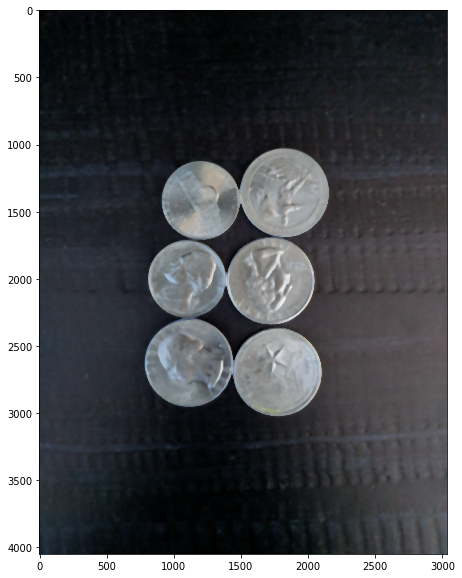

In [22]:
display(sep_blur)

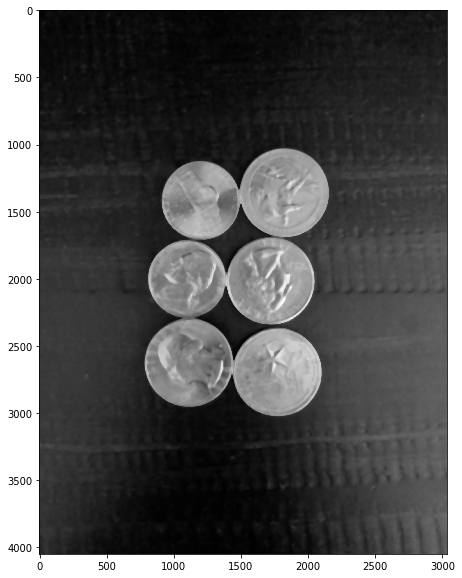

In [26]:
gray_sep_coins = cv2.cvtColor(sep_blur, cv2.COLOR_BGR2GRAY)
display(gray_sep_coins)

In [37]:
ret, sep_thresh = cv2.threshold(gray_sep_coins, 100, 255, cv2.THRESH_BINARY)

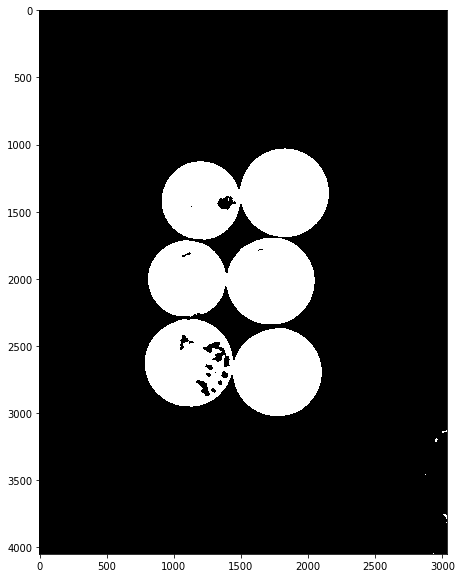

In [38]:
display(sep_thresh)

In [39]:
contours, hierarchy = cv2.findContours(sep_thresh, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

In [41]:
for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(sep_coins, contours, i, (255,0,0), 10)

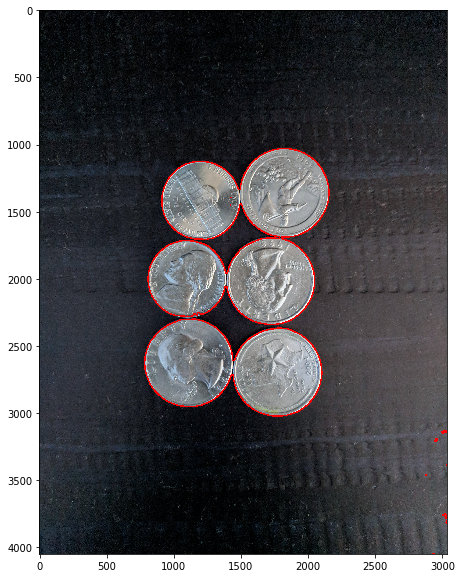

In [42]:
display(sep_coins)